In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
import time

In [4]:
file_path = '/Users/steven.souksavath/Downloads/titanic/train.csv'
df = pd.read_csv(file_path)


In [224]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


KeyboardInterrupt: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

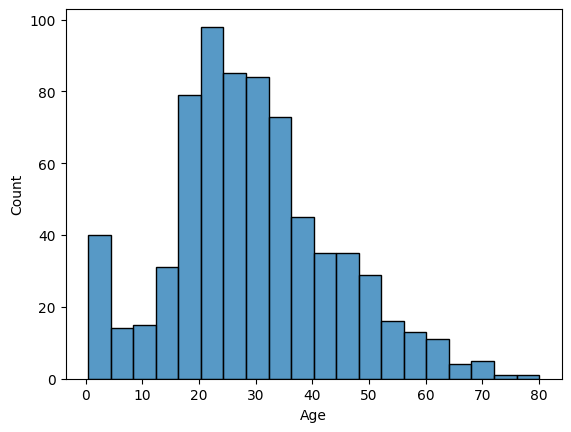

In [ ]:
sns.histplot(x=df['Age'])

In [ ]:
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Survived(Original Features):
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_4243/647209279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')


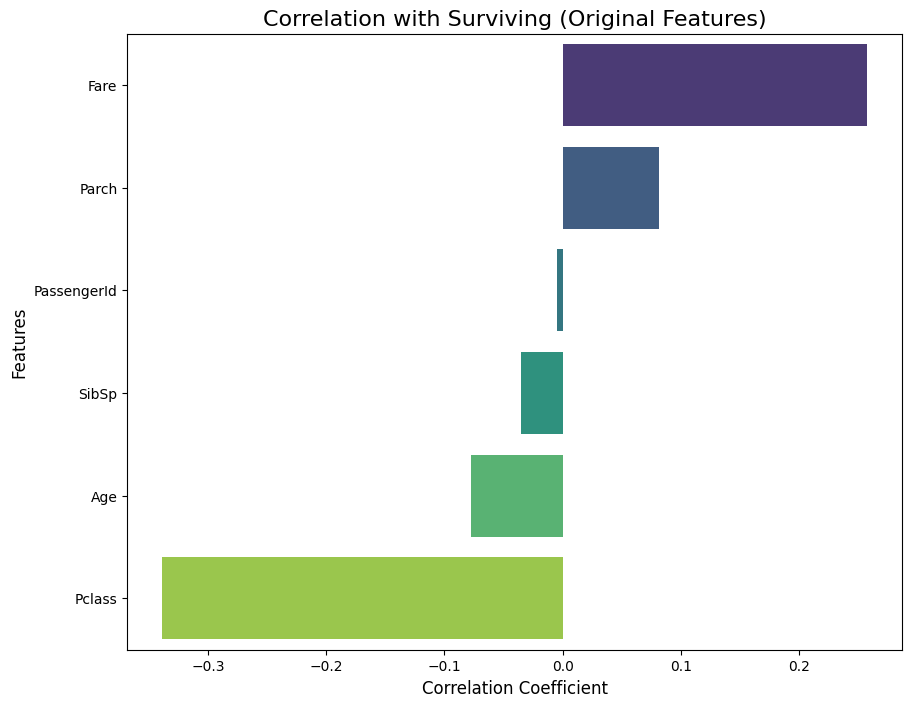

In [ ]:
# Correlation Analysis / Matrix

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

# Correlation with the target variable
attr_corr = corr_matrix['Survived'].drop('Survived').sort_values(ascending=False)
print("Survived(Original Features):")
print(attr_corr)

# Bar plot for correlation with attrition
plt.figure(figsize=(10, 8))
sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')
plt.title('Correlation with Surviving (Original Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [ ]:
#Since 20% of the user's age is missing, will impute the date with the median
#KNN Imputing
knn_imputer = KNNImputer(n_neighbors=5)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

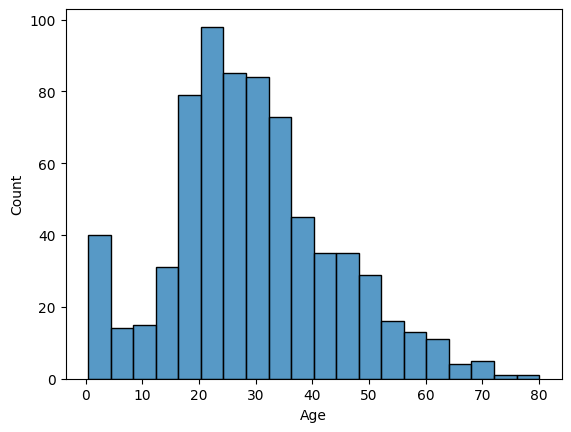

In [ ]:
#EDA

sns.histplot(x=df['Age'])

<Axes: xlabel='Parch', ylabel='Count'>

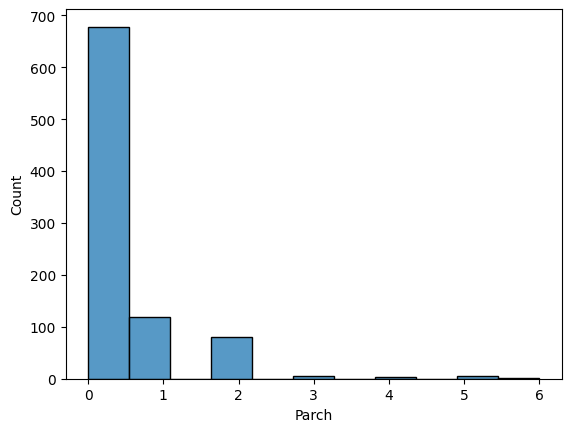

In [ ]:
sns.histplot(x=df["Parch"])

<Axes: xlabel='Fare', ylabel='Count'>

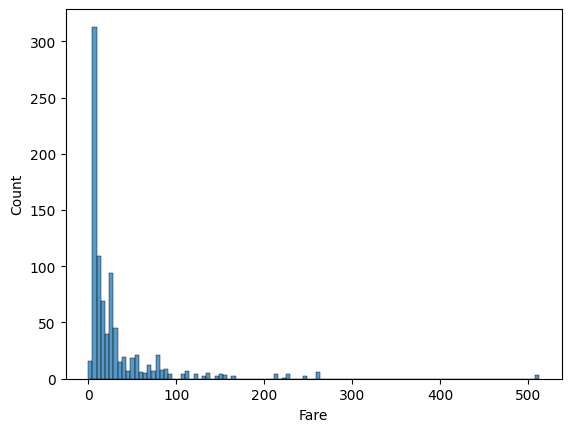

In [ ]:
sns.histplot(x=df['Fare'])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Map Gender to Binary
df['Sex'] = df['Sex'].map({'female': 0, 'male' : 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
categorical = ['Sex', 'Pclass', ]
numerical = ['Age', 'Parch']
#ranking = ['']

target = ['Survived']

# train and test set
X_train, X_test, y_train, y_test = train_test_split(df[categorical + numerical], df[target], test_size=0.3, random_state=123)

#Feature Transformers - Applying OneHotEncoding and MinMaxScaler
# prevent one hot encoder from returning a sparse matrix (GuassianNB will throw an error otherwise)
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

#Build Preprocessor
preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical)])

In [ ]:
rf = Pipeline(steps= [('preprocessor', preprocessor), ('rf', RandomForestClassifier(n_estimators=100, random_state=100))])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8059701492537313
Precision: 0.7804878048780488
Recall Score: 0.6530612244897959
F1 Score: 0.7111111111111111


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

Cross Validation F1 Scores: [0.8        0.71111111 0.69387755 0.63829787 0.69767442 0.73469388
 0.66666667 0.82352941 0.71111111 0.69767442]
Mean cross validation F1 Score: 0.7174636438774752


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Fill missing values in 'Fare'
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Step 4: Define feature matrix X and target variable y
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Bagging - Generate random samples with replacement and train multiple models
n_models = 10  # Number of models in the ensemble
np.random.seed(42)  # For reproducibility

models = []

for i in range(n_models):
    # Generate bootstrap sample
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_sample = X_train.iloc[indices]
    y_sample = y_train.iloc[indices]
    
    # Train a decision tree on the bootstrap sample
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_sample, y_sample)
    models.append(model)

# Step 7: Combine model predictions using majority voting
def majority_vote(models, X_test):
    # Get predictions from each model
    predictions = np.array([model.predict(X_test) for model in models])
    
    # Majority voting: take the mode of the predictions along the rows
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=0, arr=predictions)
    return final_predictions

# Make predictions on the test set
final_predictions = majority_vote(models, X_test)

# Step 8: Evaluate the ensemble model
accuracy = accuracy_score(y_test, final_predictions)
print(f'Bagging ensemble model accuracy: {accuracy:.4f}')


Bagging ensemble model accuracy: 0.8045


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_4243/1520521277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_4243/1520521277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [ ]:
y = df['Survived']
X = df.drop('Survived', axis=1)

all_columns = df.columns.to_list()
random_columns = [np.random.choice(all_columns, 3, replace=True).tolist() for i in range (10)]

In [ ]:
random_columns

[['Embarked_S', 'Sex_1', 'Fare'],
 ['Sex_1', 'Pclass', 'Age'],
 ['SibSp', 'Parch', 'PassengerId'],
 ['Age', 'Embarked_S', 'SibSp'],
 ['Fare', 'SibSp', 'PassengerId'],
 ['Fare', 'Sex_1', 'Fare'],
 ['Age', 'Sex_1', 'SibSp'],
 ['Embarked_S', 'Embarked_Q', 'Embarked_S'],
 ['SibSp', 'PassengerId', 'Embarked_Q'],
 ['SibSp', 'Parch', 'Age']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def build_decision_trees(X_train, y_train, num_models=10, num_columns=3):
    all_columns = X_train.columns.to_list()
    models = []
    for i in range(num_models):
        selected_columns = np.random.choice(all_columns, num_columns, replace=True).tolist()
        X_train_subset = X_train[selected_columns]
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_train_subset, y_train)
        models.append((tree, selected_columns))
    return models

In [ ]:
models = build_decision_trees(X_train, y_train, num_models=10, num_columns=3)

In [ ]:
def measure_accuracy(models, X_train, y_train):
    predictions = []

    for tree, selected_columns in models:
        X_train_subset = X_train[selected_columns]
        pred = tree.predict(X_train_subset)
        predictions.append(pred)

        predictions = np.array(predictions).T

        final_predictions, i= mode(predictions, axis=1)
        final_predictions = finalpredictions.flatten()

        accuracy  = accuracy_score(y_train, final_predictions)


        print(final_predictions)
        
        return accuracy

In [ ]:
y_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S
331,332,1,45.5,0,0,28.5000,True,False,True
733,734,2,23.0,0,0,13.0000,True,False,True
382,383,3,32.0,0,0,7.9250,True,False,True
704,705,3,26.0,1,0,7.8542,True,False,True
813,814,3,6.0,4,2,31.2750,False,False,True


In [ ]:
train_accuracy = measure_accuracy(models, X_train, y_train)

NameError: name 'finalpredictions' is not defined